In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random

pd.pandas.set_option('display.max_columns', None)
%matplotlib inline
random.seed(7)

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# src_csv = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data', 'concrete.csv'))
# df = pd.read_csv(src_csv)

# df.head()

df_train = pd.read_csv('train_concrete.csv')
df_test = pd.read_csv('test_concrete.csv')
df_dev = pd.read_csv('dev_concrete.csv')

X_train = df_train.iloc[:, :-1].values
X_test = df_test.iloc[:, :-1].values
X_dev = df_dev.iloc[:, :-1].values
y_train = df_train.iloc[:, -1].values.reshape(-1,1)
y_test = df_test.iloc[:, -1].values.reshape(-1,1)
y_dev = df_dev.iloc[:, -1].values.reshape(-1,1)

In [4]:
X_train = df_train.drop(df_train.columns[-1], axis=1).values
y_train = df_train[df_train.columns[-1]].values.reshape(-1, 1)
print(X_train.shape, y_train.shape)

(618, 8) (618, 1)


In [7]:
# train, validation, test = 60%, 20%, 20%
# X_tv, X_test, y_tv, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=7)
# X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size=0.25, random_state=7)

In [5]:
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_dev)

mse = mean_squared_error(y_dev, y_pred)
mae = mean_absolute_error(y_dev, y_pred)
r2 = r2_score(y_dev, y_pred)


y_pred_test=model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print(mae)
print(model.intercept_)
print(model.coef_)

0.41140534658379085
[-0.01935995]
[[ 0.58395384  0.34309898  0.09209805 -0.17003678  0.14737914 -0.05355631
  -0.05740711  0.49240299]]


In [6]:
class MyRidgeRegression_LSM:
    def __init__(self, learning_rate=0.01, lambda_=0.1, epochs=1000):
        self.learning_rate = learning_rate
        self.lambda_ = lambda_
        self.epochs = epochs
        self.theta = None
        
    def fit(self, X, y):        
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        I = np.identity(X.shape[1])
        I[0, 0] = 0
        
        self.theta = np.linalg.inv(X.T @ X + self.lambda_ * I) @ X.T @ y
    
    def predict(self, X):
        return X @ self.theta[1:] + self.theta[0]
    
    
model = MyRidgeRegression_LSM()
model.fit(X_train, y_train)
y_pred = model.predict(X_dev)

mse = mean_squared_error(y_dev, y_pred)
mae = mean_absolute_error(y_dev, y_pred)
r2 = r2_score(y_dev, y_pred)


y_pred_test=model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print(mae)
print(model.theta)

0.4114053465837907
[[-0.01935995]
 [ 0.58395384]
 [ 0.34309898]
 [ 0.09209805]
 [-0.17003678]
 [ 0.14737914]
 [-0.05355631]
 [-0.05740711]
 [ 0.49240299]]


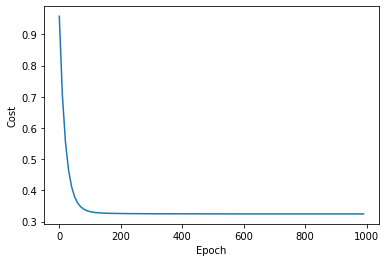

0.3889246617507743
0.6280486950085855


In [9]:
class MyRidgeRegression_BGD:
    def __init__(self, learning_rate=0.01, lambda_=0.1, epochs=1000):
        self.learning_rate = learning_rate
        self.lambda_ = lambda_
        self.epochs = epochs
        self.theta = None
        
    def fit(self, X, y):
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        n_samples, n_dims = X.shape
              
        self.theta = np.zeros((n_dims, 1))
        I = np.identity(n_dims)
        I[0, 0] = 0  
        
        cost_list = []
        epoch_list = []
    
        for epoch in range(self.epochs):
            y_pred = X @ self.theta
            
            dt = (2 / n_samples) * (X.T @ (y_pred - y)) + 2 * self.lambda_ * self.theta * I.diagonal().reshape(-1, 1)
    
            self.theta -= self.learning_rate * dt
            
            if epoch % 10 == 0:
                cost = np.mean(np.square(y_pred - y)) + self.lambda_ * np.sum(np.square(self.theta[1:]))
                cost_list.append(cost)
                epoch_list.append(epoch)
            
        plt.plot(epoch_list, cost_list)
        plt.xlabel('Epoch')
        plt.ylabel('Cost')
        plt.show()
    
    def predict(self, X):
        return X @ self.theta[1:] + self.theta[0]
    
    
model = MyRidgeRegression_BGD()
model.fit(X_train, y_train)
y_pred = model.predict(X_dev)

mse = mean_squared_error(y_dev, y_pred)
mae = mean_absolute_error(y_dev, y_pred)
r2 = r2_score(y_dev, y_pred)


y_pred_test=model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print(mse)
print(r2)